In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

titanic_data = pd.read_csv(r'https://raw.githubusercontent.com/CrestwoodPrep/Vera-Unit-6/main/titanic.csv')
titanic_data = titanic_data.drop("Name", axis = 1) 
print(titanic_data.columns)  
titanic_data.head()


Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [2]:
X = titanic_data.iloc[:,[1,3,6]]
Y = titanic_data.iloc[:,0]

#print(titanic_data.iloc[:,[1,3,6]])
#print(titanic_data.iloc[:,[0]])
survived_data = titanic_data.iloc[:,[0]] 
#print(len(survived_data[survived_data["Survived"] == 1])) 342 survived
#print(len(survived_data[survived_data["Survived"] == 0])) 545 dead
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


#print(X_train[survived_data["Survived"] == 0])  #278 survived
#print(y_train[survived_data["Survived"] == 0]) #437 dead

#print(X)
#print(Y)



|--- feature_0 <= 2.50
|   |--- feature_2 <= 13.65
|   |   |--- feature_2 <= 7.75
|   |   |   |--- class: 0
|   |   |--- feature_2 >  7.75
|   |   |   |--- class: 0
|   |--- feature_2 >  13.65
|   |   |--- feature_1 <= 40.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  40.50
|   |   |   |--- class: 0
|--- feature_0 >  2.50
|   |--- feature_1 <= 34.25
|   |   |--- feature_2 <= 7.13
|   |   |   |--- class: 0
|   |   |--- feature_2 >  7.13
|   |   |   |--- class: 0
|   |--- feature_1 >  34.25
|   |   |--- feature_2 <= 51.70
|   |   |   |--- class: 0
|   |   |--- feature_2 >  51.70
|   |   |   |--- class: 1

Report:               precision    recall  f1-score   support

           0       0.68      0.84      0.75       111
           1       0.57      0.36      0.44        67

    accuracy                           0.66       178
   macro avg       0.63      0.60      0.60       178
weighted avg       0.64      0.66      0.64       178

Report Matrix:
 [[93 18]
 [43 24]]
Accuracy: 0

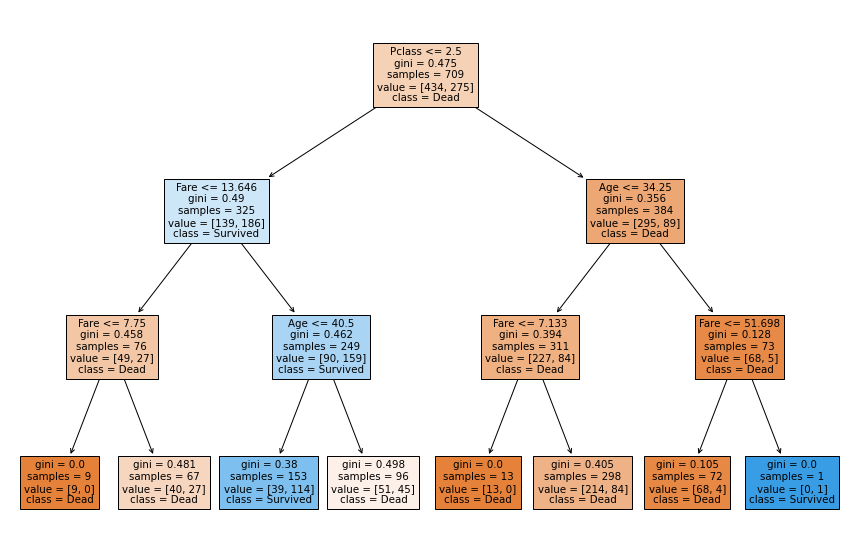

In [3]:
#1 Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn import metrics

#Training Model
tree_model = DecisionTreeClassifier(max_depth=3)
trained_decision_tree_model = tree_model.fit(X_train, y_train)

#TREE Setup
fig = plt.figure(figsize=(15,10)) #size 15, 10
tree.plot_tree(trained_decision_tree_model,  
               feature_names=["Pclass", "Age", "Fare"]
               ,class_names=["Dead", "Survived"]
               ,filled=True)
r = export_text(trained_decision_tree_model)
print(r)

#Evaluation
y_prediction_from_model = tree_model.predict(X_test)
print('Report:', metrics.classification_report(y_test, y_prediction_from_model))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_prediction_from_model))
print('Accuracy:', metrics.accuracy_score(y_test, y_prediction_from_model))

#For the data of Passenger Class, Age and Fare, VS the data of those who survived:  
#The model created by a Decision Tree with a maxinum depth of 3 was better at predicting 
#people who dead instead of people who lived. 



In [ ]:
#2 KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Training Model
knn_model = KNeighborsClassifier(n_neighbors = 7, metric = "manhattan")
knn_model.fit(X_train, y_train)

#Evaluation
y_prediction_from_model = knn_model.predict(X_test)
print('Report:', metrics.classification_report(y_test, y_prediction_from_model))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_prediction_from_model))
print('Accuracy:', metrics.accuracy_score(y_test, y_prediction_from_model))

#For the data of Passenger Class, Age and Fare, versus the data of those who survived:  
#The model created by a KNN Model with k=7 using Manhattan Distance was better at predicting 
#people who dead instead of people who lived. 

Report:               precision    recall  f1-score   support

           0       0.78      0.80      0.79       110
           1       0.66      0.63      0.65        68

    accuracy                           0.74       178
   macro avg       0.72      0.72      0.72       178
weighted avg       0.73      0.74      0.73       178

Report Matrix:
 [[88 22]
 [25 43]]
Accuracy: 0.7359550561797753


In [ ]:
#3 Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Training Model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

#Evaluation
y_prediction_from_model = NB_model.predict(X_test)
print('Report:', metrics.classification_report(y_test, y_prediction_from_model))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_prediction_from_model))
print('Accuracy:', metrics.accuracy_score(y_test, y_prediction_from_model))

#For the data of Passenger Class, Age and Fare, versus the data of those who survived:  
#The model created by a Naive Bayes was better at predicting 
#people who dead instead of people who lived. 

Report:               precision    recall  f1-score   support

           0       0.70      0.90      0.79       110
           1       0.70      0.38      0.50        68

    accuracy                           0.70       178
   macro avg       0.70      0.64      0.64       178
weighted avg       0.70      0.70      0.68       178

Report Matrix:
 [[99 11]
 [42 26]]
Accuracy: 0.702247191011236


In [ ]:
#4 LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#Training Model
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

#Evaluation
y_prediction_from_model = LDA_model.predict(X_test)
print('Report:', metrics.classification_report(y_test, y_prediction_from_model))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_prediction_from_model))
print('Accuracy:', metrics.accuracy_score(y_test, y_prediction_from_model))


#For the data of Passenger Class, Age and Fare, versus the data of those who survived:  
#The model created by a LDA was better at predicting 
#people who dead instead of people who lived. 

Report:               precision    recall  f1-score   support

           0       0.73      0.82      0.77       110
           1       0.64      0.51      0.57        68

    accuracy                           0.70       178
   macro avg       0.68      0.67      0.67       178
weighted avg       0.70      0.70      0.69       178

Report Matrix:
 [[90 20]
 [33 35]]
Accuracy: 0.702247191011236


In [ ]:
#5 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Training Model
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

#Evaluation
y_prediction_from_model = LR_model.predict(X_test)
print('Report:', metrics.classification_report(y_test, y_prediction_from_model))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_prediction_from_model))
print('Accuracy:', metrics.accuracy_score(y_test, y_prediction_from_model))


#For the data of Passenger Class, Age and Fare, versus the data of those who survived:  
#The model created by a Logistic Regression was better at predicting 
#people who dead instead of people who lived. 

Report:               precision    recall  f1-score   support

           0       0.73      0.82      0.77       110
           1       0.63      0.50      0.56        68

    accuracy                           0.70       178
   macro avg       0.68      0.66      0.66       178
weighted avg       0.69      0.70      0.69       178

Report Matrix:
 [[90 20]
 [34 34]]
Accuracy: 0.6966292134831461


In [ ]:
#6 SVM
from sklearn.svm import SVC
from sklearn import metrics

#Training Model
SVM_model = SVC(gamma='auto')
SVM_model.fit(X_train, y_train) 

#Evaluation
y_prediction_from_model = SVM_model.predict(X_test)
print('Report:', metrics.classification_report(y_test, y_prediction_from_model))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_prediction_from_model))
print('Accuracy:', metrics.accuracy_score(y_test, y_prediction_from_model))

#For the data of Passenger Class, Age and Fare, versus the data of those who survived:  
#The model created by a SVM was better at predicting 
#people who dead instead of people who lived. 

Report:               precision    recall  f1-score   support

           0       0.69      0.85      0.76       110
           1       0.61      0.40      0.48        68

    accuracy                           0.67       178
   macro avg       0.65      0.62      0.62       178
weighted avg       0.66      0.67      0.66       178

Report Matrix:
 [[93 17]
 [41 27]]
Accuracy: 0.6741573033707865


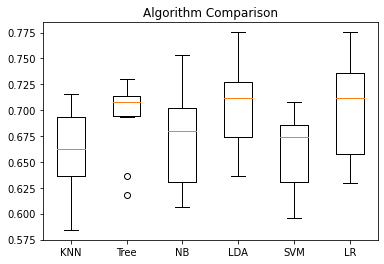

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

names = ['PClass', 'Age', 'Fare', 'Survived']
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 7, metric = "manhattan")))
models.append(('Tree', DecisionTreeClassifier(max_depth=3)))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#By this comparison graph, thw Decision Tree, LDA and LR seems to have similar amounts for the accuracy.
#KNN, NB and SVM does not seem to be the best for creating a prediction model
#However, the error for Decision Tree is the smallest even though it is a little less accurate than LDA/LR.
#Therfore, the Decision Tree seems to be for the best.
#KNN, NB, LDA, and LR all have large errors.

#Decision tree worked best because it is the best for a combination of categorical and continuous numerical data. 
#The algorithm divids data into multiple chunks, and categorizes based on certain properties to build a more accurate prediction model more simplerly given the data I used.
#Decision tree also had some outliers. The decision trees make predictions based on cutpoints of data could make this outlier.
#In real life, there are the possibilities of people who survived even though they're too young/old/poor and those who live despite being in fortunate circumstances


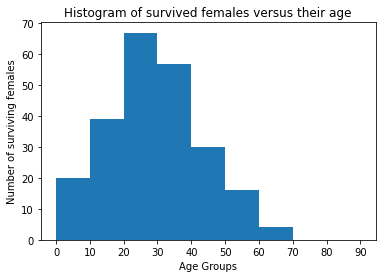

In [ ]:
#female in different ages compares to the number survived
#print(titanic_data)
survived_female_data = titanic_data[(titanic_data['Sex'] == "female") & (titanic_data['Survived'] == 1)]
#print(survived_female_data)
age_of_survived_females = survived_female_data["Age"]
#print(age_of_survived_females)
age_of_survived_females_as_list = age_of_survived_females.tolist()
#print(age_of_survived_females_as_list)

     
bin_edges = [0,10,20,30,40, 50, 60, 70, 80, 90]
plt.hist(age_of_survived_females_as_list, bins=bin_edges)
plt.xticks(bin_edges)
plt.xlabel('Age Groups')
plt.ylabel('Number of surviving females')
plt.title('Histogram of survived females versus their age')
plt.show()

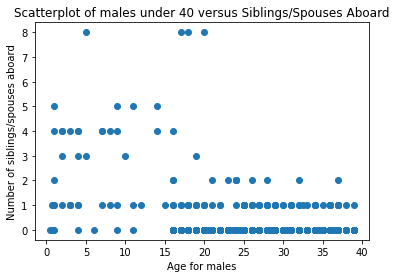

In [ ]:
#male under the age of 40 compares to the numbers of their siblings
titanic_data_males_under_forty = titanic_data[(titanic_data['Sex'] == "male") & (titanic_data['Age'] < 40)]
male_under_forty_ages_and_siblings = titanic_data_males_under_forty[['Age', 'Siblings/Spouses Aboard']]
male_under_forty_ages_as_list = male_under_forty_ages_and_siblings["Age"].tolist()
male_under_forty_list = male_under_forty_ages_and_siblings['Siblings/Spouses Aboard'].tolist()

plt.scatter(male_under_forty_ages_as_list, male_under_forty_list)
plt.xlabel('Age for males')
plt.ylabel('Number of siblings/spouses aboard')
plt.title('Scatterplot of males under 40 versus Siblings/Spouses Aboard')
plt.show()

     Survived  Pclass  ... Parents/Children Aboard     Fare
7           0       3  ...                       1  21.0750
10          1       3  ...                       1  16.7000
16          0       3  ...                       1  29.1250
24          0       3  ...                       1  21.0750
49          0       3  ...                       1  39.6875
..        ...     ...  ...                     ...      ...
849         1       1  ...                       1  39.4000
851         1       3  ...                       1   9.3500
854         1       3  ...                       3  19.2583
865         1       3  ...                       1  11.1333
876         1       2  ...                       1  26.0000

[76 rows x 7 columns]


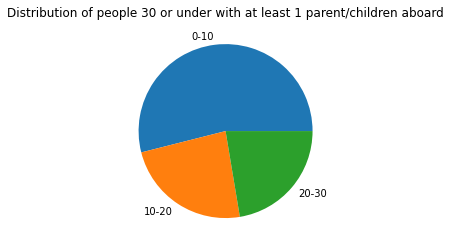

In [ ]:
#the percentage of people in different ages that is under 30 compares with their parents
under_thirty_with_parent_or_sibling = titanic_data[(titanic_data['Age'] <= 30) & titanic_data["Parents/Children Aboard"] >= 1]
print(under_thirty_with_parent_or_sibling)

zero_to_ten = under_thirty_with_parent_or_sibling[under_thirty_with_parent_or_sibling["Age"] <= 10] 
#print(titanic_data_zero_to_ten)
#print(len(zero_to_ten))
eleven_to_twenty = under_thirty_with_parent_or_sibling[(under_thirty_with_parent_or_sibling["Age"] > 10) & (under_thirty_with_parent_or_sibling["Age"] <= 20)]
#print(len(eleven_to_twenty))
twenty_one_to_thirty = under_thirty_with_parent_or_sibling[(under_thirty_with_parent_or_sibling["Age"] > 20) & (under_thirty_with_parent_or_sibling["Age"] <= 30)]
#print(len(twenty_one_to_thirty))



pie_chart_data = [len(zero_to_ten), len(eleven_to_twenty), len(twenty_one_to_thirty)]
plt.pie(pie_chart_data, labels = ["0-10", "10-20", "20-30"])
plt.title('Distribution of people 30 or under with at least 1 parent/children aboard')
plt.show() 


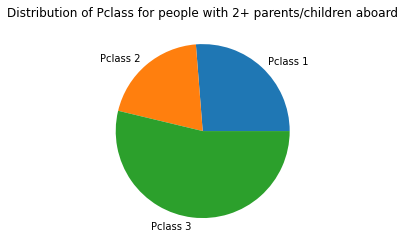

In [ ]:
#the percentage of people in different Pclasses with 2 parents
titanic_data_with_two_parents = titanic_data[(titanic_data['Parents/Children Aboard'] == 2)]
number_of_p_class_1 = len(titanic_data_with_two_parents[titanic_data_with_two_parents["Pclass"] == 1])
number_of_p_class_2 = len(titanic_data_with_two_parents[titanic_data_with_two_parents["Pclass"] == 2])
number_of_p_class_3 = len(titanic_data_with_two_parents[titanic_data_with_two_parents["Pclass"] == 3])

pie_chart_data = [number_of_p_class_1, number_of_p_class_2, number_of_p_class_3]
plt.title('Distribution of Pclass for people with 2+ parents/children aboard')
plt.pie(pie_chart_data, labels = ["Pclass 1", "Pclass 2", "Pclass 3"])
plt.show() 

Text(0.5, 1.0, 'Scatterplot of age versus fare price')

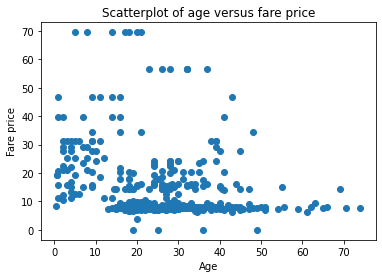

In [ ]:
#people in different ages compares to the price of their fare tickets
titanic_data_p_class_3 = titanic_data[titanic_data["Pclass"]==3]
titanic_data_age_fare = titanic_data_p_class_3[["Age", "Fare"]]

titanic_data_age_as_list = titanic_data_age_fare["Age"].to_list()
titanic_data_age_as_fare = titanic_data_age_fare["Fare"].to_list()

plt.scatter(titanic_data_age_as_list , titanic_data_age_as_fare)
plt.xlabel('Age')
plt.ylabel('Fare price')
plt.title('Scatterplot of age versus fare price')

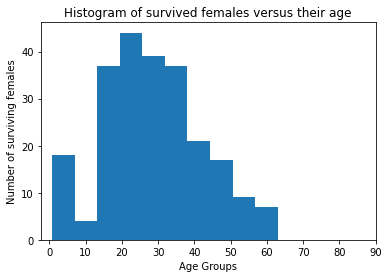

In [ ]:
#additional
age_of_survived_females.plot(kind='hist', xticks=bin_edges)
plt.xticks(bin_edges)
plt.xlabel('Age Groups')
plt.ylabel('Number of surviving females')
plt.title('Histogram of survived females versus their age')
plt.show()